In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_54554_G')

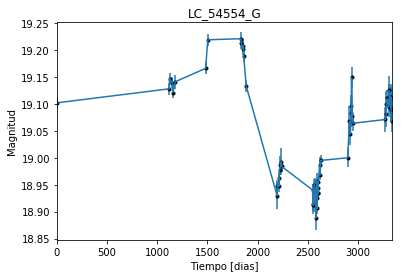

In [2]:
data = np.genfromtxt('LC_54554_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_54554_G')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

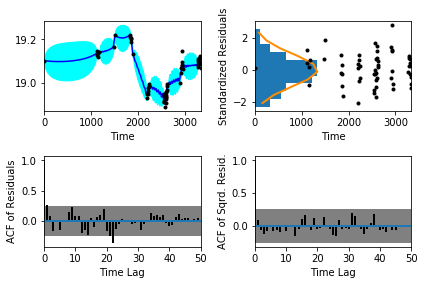

In [5]:
sample.assess_fit()

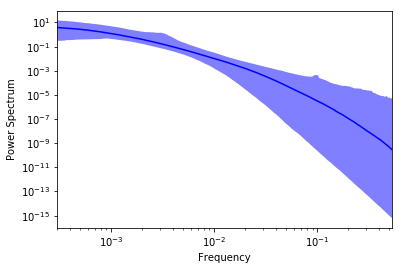

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_54554_G')

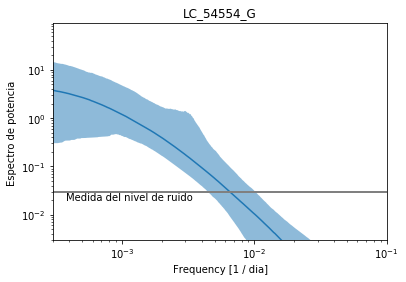

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_54554_G')

Text(0.5,1,'Prediccion , valor esperado LC_54554_G')

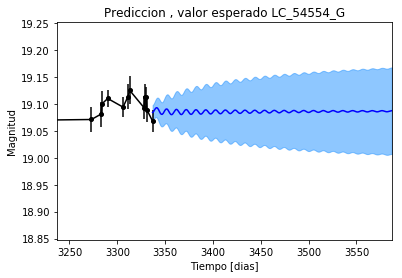

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_54554_G')

Text(0.5,1,'Prediccion, Caminos simulados LC_54554_G')

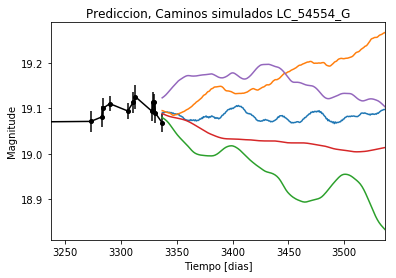

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_54554_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_54554_G')

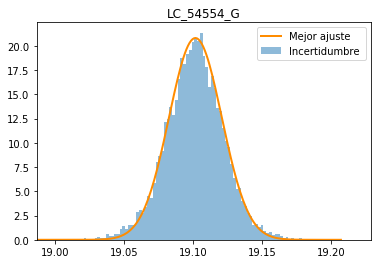

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_54554_G')

Text(0.5,1,'Interpolacion, camino simulado 54554_G')

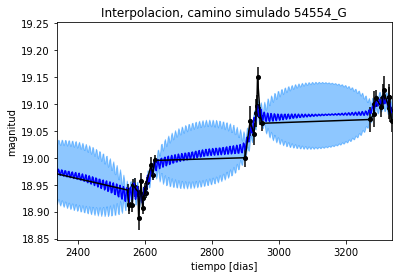

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado 54554_G')

Text(0.5,1,'Interpolacion, camino simulado LC_54554_G')

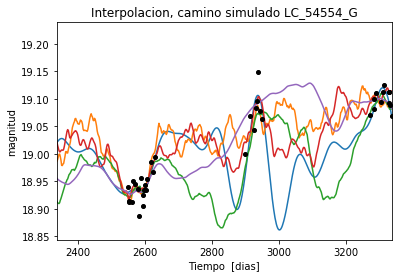

In [14]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_54554_G')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 942.169490783
Median: 0.0190063831369
Standard deviation: 0.199319094246
68% credibility interval: [ 0.00158415  0.1991668 ]
95% credibility interval: [  3.70495055e-04   7.96979418e-01]
99% credibility interval: [  3.13546608e-04   9.84027093e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 474.99860725
Median: 0.00375355825269
Standard deviation: 0.0756869076937
68% credibility interval: [ 0.00044423  0.04339913]
95% credibility interval: [ 0.00031593  0.24412968]
99% credibility interval: [  3.02108625e-04   5.14082462e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 505.590558489
Median: 0.0521803937641
Standard d

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 679.384021236
Median: 153.86900857
Standard deviation: 1.83765855059
68% credibility interval: [ 151.86580042  155.22102455]
95% credibility interval: [ 149.29493736  156.24494743]
99% credibility interval: [ 147.27311762  158.8891254 ]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 334.283524934
Median: 0.988949919355
Standard deviation: 2.23937711941
68% credibility interval: [ 0.14037137  4.21780277]
95% credibility interval: [ 0.03394895  7.53164563]
99% credibility interval: [  0.01488782  10.66538723]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 523.17684482
Median: 1.29576180983
Standard deviation: 10.4069344837
68% credibility interval: [  0.06220027  13.33893668]
95% credibility interval: [  4.64006596e

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 647126.588508
Median: 7.30347010917e-22
Standard deviation: 1.81583849416e+137
68% credibility interval: [  4.55646281e-46   6.48160598e+09]
95% credibility interval: [  1.85320092e-58   6.12975643e+56]
99% credibility interval: [  9.16946897e-068   2.11781302e+122]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1469.34394643
Median: 19.0843605236
Standard deviation: 0.0442673168618
68% credibility interval: [ 19.04476468  19.12288471]
95% credibility interval: [ 18.99731177  19.17741989]
99% credibility interval: [ 18.94857654  19.22472598]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 369.494439259
Median: 0.0389159024179
Standard deviation: 0.282476530634
68% credibility interval: [ 0.          0.49761303]
95% credibility interval: [ 0.          0.95304731]
99% credibility interval: [ 0.          1.04584364]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 369.494439259
Median: 0.0389159024179
Standard deviation: 0.282476530634
68% credibility interval: [ 0.          0.49761303]
95% credibility interval: [ 0.          0.95304731]
99% credibility interval: [ 0.          1.04584364]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 654.253264985
Median: 0.0
Standard deviation: 0.000500659776808
68% cr

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 679.384021236
Median: 153.86900857
Standard deviation: 1.83765855059
68% credibility interval: [ 151.86580042  155.22102455]
95% credibility interval: [ 149.29493736  156.24494743]
99% credibility interval: [ 147.27311762  158.8891254 ]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1192.98901424
Median: 0.00917397538509
Standard deviation: 0.00766264014323
68% credibility interval: [ 0.0058024  0.0158238]
95% credibility interval: [ 0.00393303  0.02960714]
99% credibility interval: [ 0.00308666  0.0516057 ]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 777.087182813
Median: 1.1544472133
Standard deviation: 0.210488754444
68% credibility interval: [ 0.96339466  1.37872025]
95% credibility interval: [ 0.80575058  1.62740429]
99% credibility interval: [ 0.73068732  1.8064617 ]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 444.637223656
Median: 0.000657308578695
Standard deviation: 0.109032826779
68% credibility interval: [  2.24062684e-14   2.09149710e-02]
95% credibility interval: [  1.82986181e-59   2.49746231e-01]
99% credibility interval: [  6.96131814e-126   8.26185698e-001]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 942.169490783
Median: (-0.119420627268-0.186198061539j)
Standard deviation: 2.17221167713
68% credibility interval: [-1.25140189-6.09070354j -0.00995349-1.22961922j]
95% credibility interval: [ -5.00756937e+00+0.j          -2.32788908e-03-0.10568419j]
99% credibility interval: [ -6.18282457e+00+0.j         -1.97007144e-03-0.0012928j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 474.99860725
Median: (-0.023584302063+0j)
Standard deviation: 1.83745841483
68% credibility interval: [-0.27268478+0.86090767j -0.00279121+0.j        ]
95% credibility interval: [-1.53391199+4.56777502j -0.00198506+3.41748776j]
99% credibility interval: [ -3.23007537e+00+5.7852272j  -1.89820447e-03+0.j       ]
Posterior summary for parameter 